# Box and Whisker Plots

### Project Intentions

* Look at the history of boxplots and the reasons why this graphical representation was adopted by so many in the 20th Century
* Explain how to read box and whisker plots
* Use boxplots, and variations of boxplots to graphically display data
* Investigate the limitations of boxplots, and alternatives to boxplots

### Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Definitions

Before we look at box plots, it's important to know a little about the statistical measures a box plot represents. 

* **Maximum Value** is the largest numerical value in a data set. 
* **Minimum Value** is the smallest numerical value in a data set. 
* **The Range** is the difference between the Max and Min values.
* **Outlier** is a data point that is noticeably larger or smaller than other data points in the set. 
* **Median** (Q2) is the middle value when data is ordered. It is a useful measure of central tendency, when the set contains extreme values or outliers. 
* **Lower Quartile** (Q1) is the median of the lower half of the data set. 
* **Upper Quartile** (Q3) is the median of the upper half of the data set. 
* **Interquartile Range** is the difference between the Q3 and Q1 values. It is a measure of spread which can be useful in sets containing outliers. 

A basic boxplot, is a graphical representation of these statistics. 

<img src='images/boxplot_basic.png' width = 50% align = 'left' style ='margin:0px 60px' >
<br>
1. Minimum value
2. Lower Quartile (Q1)
3. Median(Q2)
4. Upper Quartile(Q3)
5. Maximum value

In a box plot the length of the whiskers, the lines extending from the box, is equal to the range.

The length of the box is equal to the Interquartile Range, and 50% of my data is contained within the box.

### History of the Boxplot

### Usefulness

#### Standard Normal Distribution without Outliers

In [67]:
y = np.random.standard_normal(100000)

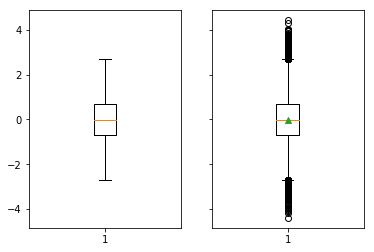

In [79]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.boxplot(y, showcaps = True, showfliers= False)
ax2.boxplot(y, showcaps = True, showmeans = True)
plt.show()

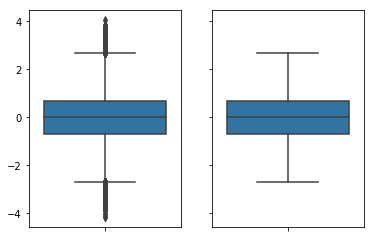

In [66]:
f, axes = plt.subplots(1, 2, sharey = True)

sns.boxplot(y, ax=axes[0],  orient = 'v')
sns.boxplot(y, showfliers = False, ax = axes[1],  orient = 'v')
plt.show()

#Reference: https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot

### Variations

### Alternatives

### References

* Hadley Wickham and Lisa Stryjewski. [40 years of boxplots](http://vita.had.co.nz/papers/boxplots.pdf), November 29, 2011.


* [Boxplot, Seaborn Documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
* [Boxplot, Mathplotlib Documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
* [Understanding Boxplots, on TowardsDataScience.com](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)


* [Box plot, Wikipedia page](https://en.wikipedia.org/wiki/Box_plot)
* [John Tukey, Wikipedia page](https://en.wikipedia.org/wiki/John_Tukey)